In [0]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn import datasets
from torch import optim
from sklearn.model_selection import train_test_split

In [0]:
X,y = datasets.make_blobs(n_samples = 100,centers = [[-0.9,0.9],[0.9,-0.9]],cluster_std = 0.4,random_state = 13)
X_train,X_test,Y_train,Y_test = map(torch.tensor,(train_test_split(X,y, stratify =y, random_state=3)))


In [0]:
type(X_train)

torch.Tensor

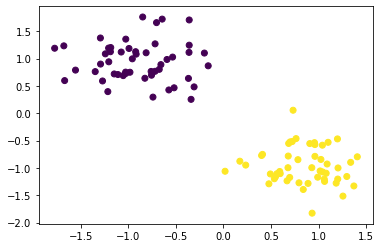

In [0]:
plt.scatter(X[:,0],X[:,1],c=y)

In [0]:
Y_train, Y_test = Y_train.view(75,1) , Y_test.view(25,1)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

torch.Size([75, 2]) torch.Size([75, 1]) torch.Size([25, 2]) torch.Size([25, 1])


In [0]:
class FC(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(2,2)
    self.linear2 = nn.Linear(2,1)
  def forward(self,X):
    a1 = self.linear1(X)
    h1 = F.relu(a1)
    a2 = self.linear2(h1)
    h2 = F.sigmoid(a2)
    return h2

In [0]:
model = FC()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0,loss is 0.7265598773956299
epoch 1,loss is 0.7258838415145874
epoch 2,loss is 0.7252094149589539
epoch 3,loss is 0.7245370745658875
epoch 4,loss is 0.7238665819168091
epoch 5,loss is 0.7231982946395874
epoch 6,loss is 0.7225320339202881
epoch 7,loss is 0.7218675017356873
epoch 8,loss is 0.7212049961090088
epoch 9,loss is 0.7205442190170288
epoch 10,loss is 0.7198852300643921
epoch 11,loss is 0.7192276120185852
epoch 12,loss is 0.7185714840888977
epoch 13,loss is 0.7179163098335266
epoch 14,loss is 0.7172624468803406
epoch 15,loss is 0.7166092395782471
epoch 16,loss is 0.7159566283226013
epoch 17,loss is 0.7153049111366272
epoch 18,loss is 0.7146535515785217
epoch 19,loss is 0.7140029072761536
epoch 20,loss is 0.7133529782295227
epoch 21,loss is 0.7127031683921814
epoch 22,loss is 0.7120538949966431
epoch 23,loss is 0.7114052176475525
epoch 24,loss is 0.7107564806938171
epoch 25,loss is 0.7101088166236877
epoch 26,loss is 0.7094610929489136
epoch 27,loss is 0.7088143229484558
ep

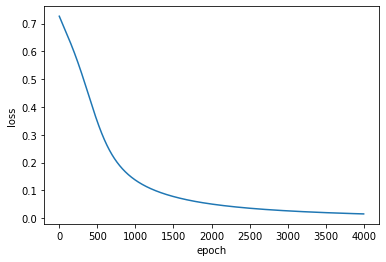

In [0]:
initial = time()
epochs = 4000
learning_rate = 0.02
losses = []
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())
for i in range(epochs):
  y_pred = model(X_train.float())
  loss = criterion(y_pred,Y_train.float())
  print(f'epoch {i},loss is {loss}')
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')
final = time()
print(f'time taken is {final - initial}')


  


In [0]:
list(model.parameters())

[Parameter containing:
 tensor([[-1.6257,  2.0603],
         [-1.9138,  1.5414]], requires_grad=True), Parameter containing:
 tensor([1.5843, 1.7696], requires_grad=True), Parameter containing:
 tensor([[-1.3188, -1.2376]], requires_grad=True), Parameter containing:
 tensor([3.5887], requires_grad=True)]